In [3]:
#resmumo da materia cayn 

# em topicos  de regressão linear  regressão logica/ gradiente decendente / e newthon raspon 

Modelo simple de regressão Linear :

In [4]:
# bibliotecas permitidas 

import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt




In [5]:
# Display only 2 decimals on pandas data frames
pd.options.display.float_format = '{:.2f}'.format

# Display all cell results (not only last one)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
dados = pd.read_csv(r'c:\Users\rsc01\Downloads\mtcars.csv')
dados.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


In [7]:
#valores 
X = dados[['wt']]
y = dados[['mpg']]

regr = LinearRegression()
regr.fit(X, y)


LinearRegression()

In [8]:
#beta zero 
b0 = regr.intercept_

# beta inicial 
b1 = regr.coef_[0]

print(f"LinearRegression()")
print(f"b0: {np.round(b0, 4)}\nb1: {np.round(b1, 4)}")

LinearRegression()
b0: [37.2851]
b1: [-5.3445]


In [9]:
#calculaando o b0 e b1
def beta_zero(x,y,b1):
    x_barra = np.mean(x)
    y_barra = np.mean(y)
    b0 = y_barra - b1 * x_barra
    return(b0)


In [10]:
def beta_um(x,y):
    x_barra = np.mean(x)
    y_barra = np.mean(y)
    b1_cima = ((x - x_barra )* (y - y_barra)).sum()
    b1_baixo = ((x - x_barra)**2).sum()
    b1 = b1_cima / b1_baixo

    return(b1)

In [11]:
#definindo x  / y 
x_ = dados['wt']
y_  = dados['mpg']

b1_ = beta_um(x_, y_)
b0_ = beta_zero(x_, y_, b1 = b1_)

print(f"LinearRegression()")
print(f"b0: {np.round(b0, 4)}\nb1:{np.round(b1, 4)}" )

print(f"\nBetas")
print(f"b0: {np.round(b0_, 4)}\nb1: {(b1_, 4)}")

LinearRegression()
b0: [37.2851]
b1:[-5.3445]

Betas
b0: 37.2851
b1: (-5.344471572722676, 4)


In [12]:
#dados de horas de estudo 
df = pd.read_csv(r'c:\Users\rsc01\Downloads\df_notas.csv')
df.head()

,nota,hrs_estudo,faltas
0,9.00,4.00,2
1,7.00,4.00,1
2,5.50,2.00,4
3,8.00,3.00,1
4,2.00,0.50,5


In [13]:
# Modelo 1: Regressão com horas de estudo
modelo_1 = smf.ols("nota ~ hrs_estudo", data=df).fit()

# Modelo 2: Regressão com horas de estudo e faltas
modelo_2 = smf.ols("nota ~ hrs_estudo + faltas", data=df).fit()

print(f"Intercepto: {modelo_1.params['Intercept']: .2f}| HORAS DE ESTUDO : {modelo_1.params['hrs_estudo']:.2f}")
print(f"Intercepto: {modelo_2.params['Intercept']: .2f}| HORAS DE ESTUDO : {modelo_2.params['hrs_estudo']:.2f} | FALTAS : {modelo_2.params['faltas']:.2f} ")

Intercepto:  2.30| HORAS DE ESTUDO : 1.50
Intercepto:  3.50| HORAS DE ESTUDO : 1.27 | FALTAS : -0.26 


In [14]:
#funções auxiliares 

def mean(values):
    return sum(values) / len(values)
def variance(values, mean_values):
    return sum((x - mean_values)** 2 for x in values)
def covariance(x, mean_x, y, mean_y):
    return sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x)))

β0 (Intercepto): 3.502605153467213
β1 (Coeficiente Hrs_estudo): 1.2660098522167509
β2 (Coeficiente Faltas): -0.26056271314891827


Text(0.5, 0, 'Hrs_estudo / Faltas')

Text(0, 0.5, 'Nota')

Text(0.5, 1.0, 'Regressão Linear Simples')

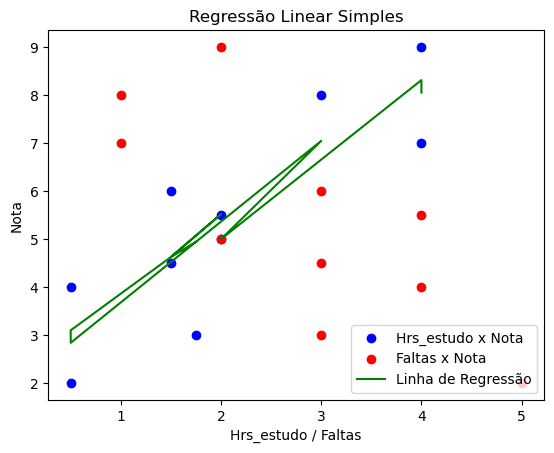

In [15]:
#medias das variavies  
mean_hrs_estudo = mean(df['hrs_estudo'])
mean_faltas = mean(df['faltas'])
mean_nota = mean(df['nota'])

# Variâncias e covariâncias
var_hrs_estudo = variance(df['hrs_estudo'], mean_hrs_estudo)
var_faltas = variance(df['faltas'], mean_faltas)

covar_nota_hrs_estudo = covariance(df['hrs_estudo'], mean_hrs_estudo, df['nota'], mean_nota)
covar_nota_faltas = covariance(df['faltas'], mean_faltas, df['nota'], mean_nota)

# Calcular os coeficientes β1 e β2
beta1 = (covar_nota_hrs_estudo * var_faltas - covar_nota_faltas * covariance(df['hrs_estudo'], mean_hrs_estudo, df['faltas'], mean_faltas)) / (var_hrs_estudo * var_faltas - covariance(df['hrs_estudo'], mean_hrs_estudo, df['faltas'], mean_faltas) ** 2)
beta2 = (covar_nota_faltas - beta1 * covariance(df['hrs_estudo'], mean_hrs_estudo, df['faltas'], mean_faltas)) / var_faltas

# Calcular o coeficiente β0
beta0 = mean_nota - beta1 * mean_hrs_estudo - beta2 * mean_faltas

# Exibir os coeficientes calculados manualmente
print(f"β0 (Intercepto): {beta0}")
print(f"β1 (Coeficiente Hrs_estudo): {beta1}")
print(f"β2 (Coeficiente Faltas): {beta2}")

# Função para fazer previsões
def predict(hrs, fal):
    return beta0 + beta1 * hrs + beta2 * fal

# Fazer previsões com base nos dados
nota_pred = [predict(h, f) for h, f in zip(df['hrs_estudo'], df['faltas'])]

# Gráfico: Hora de Estudo x Nota e Faltas x Nota
plt.scatter(df['hrs_estudo'], df['nota'], color='blue', label='Hrs_estudo x Nota')
plt.scatter(df['faltas'], df['nota'], color='red', label='Faltas x Nota')

# Adicionar a linha de regressão
plt.plot(df['hrs_estudo'], nota_pred, color='green', label='Linha de Regressão')

# Adicionar rótulos e título
plt.xlabel('Hrs_estudo / Faltas')
plt.ylabel('Nota')
plt.title('Regressão Linear Simples')
plt.legend()

# Mostrar o gráfico
plt.show()

Gradiente decendente 

É um dos algoritimos de otimização mais ultizados especificamente em redes neurais e regressão linear. seu objetivo é minimizar a função de custo (geralmente  o erro  medio quadratico) ajustando os paramentros de B(beta) 

* O gradiente calcula a direção em que os parametros B devem ser ajustado para minizar o erro 
* no caso da regressão linar o calculo dos parametros beta é feito para minimizar o erro quadratico medio e não é necessario igualar a derivada a zero diretamente 

usado encontrar os parametros que minizam a função de custo em relação aos parametros beta e ajustando os pesos de acordo com direção do gradiente 

o vetor de derivadas parciais em relação aos parâmetros 
β
. A taxa de aprendizado 
α
 determina o tamanho do passo em cada atualização, visando atingir o mínimo (local).
uma taxa de aprendizado muito pequena são necessários muitas iterações para encontrar o mínimo. Todavia, caso a taxa de aprendizado seja muito grande, você pode acabar “pulando” o ponto de mínimo desejado

In [16]:
# ultilização em dados reais 
dados2 = pd.read_csv(r'c:\Users\rsc01\Downloads\bank_customer_treino (1).csv')
dados2.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15765192,564,France,Male,26,7,84006.88,2,0,0,183490.99,0
1,15631882,688,Germany,Male,45,9,103399.87,1,0,0,129870.93,0
2,15777586,784,Spain,Female,42,2,109052.04,2,1,0,6409.55,0
3,15577107,657,Spain,Female,22,6,0.00,3,0,1,168412.07,1
4,15722731,653,France,Male,46,0,119556.10,1,1,0,78250.13,1


In [17]:
# pre pocessaamoento 
dados2['gender'] = np.where(dados2.gender == "Male", 1,0)

In [18]:
#funções auxiliadores  

def normaliza(coluna):
    return (coluna - coluna.mean()) / coluna.std()
# Função para criar a matriz X
def matriz_x(colunas, dados2):
    return dados2[colunas].values
def beta_inicial(X):
    return np.zeros(X.shape[1])
def calcula_p(X, B):
    z = X @ B
    return 1 / (1 + np.exp(-z))
def w_diag(p):
    return np.diag(p * (1- p))
def beta_update(X, w, y, p):
    return np.linalg.inv(X.T @ w @ X) @ X.T @ ( y - p )

In [19]:
dados2['credit_score_std'] = normaliza(dados2.credit_score)
dados2['age_std'] = normaliza(dados2.age)
dados2.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_score_std,age_std
0,15765192,564,France,1,26,7,84006.88,2,0,0,183490.99,0,-0.88,-1.23
1,15631882,688,Germany,1,45,9,103399.87,1,0,0,129870.93,0,0.40,0.56
2,15777586,784,Spain,0,42,2,109052.04,2,1,0,6409.55,0,1.39,0.27
3,15577107,657,Spain,0,22,6,0.00,3,0,1,168412.07,1,0.08,-1.61
4,15722731,653,France,1,46,0,119556.10,1,1,0,78250.13,1,0.03,0.65


In [20]:
colunas = {
    'y': 'churn',
    'x': ['credit_score', 'gender', 'age', 'credit_card'],
    'x_std': ['credit_score_std', 'gender', 'age_std', 'credit_card']
    }

In [21]:
y = dados2[colunas['y']]
X_mat = matriz_x(colunas = colunas['x'], dados2=dados2)
X_mat_std = matriz_x(colunas=colunas['x_std'], dados2=dados2)

Newthon-raphson 

In [30]:
#calculo feito da mao 


#betas = beta_inicial(X_mat)
#p = calcula_p(X=X_mat, B=betas)
#w = np.dig(p)

#for i in range(20):
    #p  = calcula_p(X=X_mat, B=betas)
    #w = np.dig(p)
    #beta_k1 = beta_update(X=X_mat, w=w, y=y, p=p)
    #betas = betas = beta_k1

In [23]:
betas = beta_inicial(X_mat)
for i in range(20):
    p = calcula_p(X=X_mat, B=betas)
    w = w_diag(p)
    beta_k1 = beta_update(X=X_mat, w=w, y=y, p=p)
    betas = beta_k1

In [24]:
print("Betas ajustados via Newton-Raphson:")
print(betas)

Betas ajustados via Newton-Raphson:
[-0.00193388 -0.26011322  0.02254072 -0.10364824]


In [25]:
#gradiente decendente 
betas_std = beta_inicial(X_mat_std)
lr = 0.01 
m = X_mat.shape[0]

for i in range(20000):
    p = calcula_p(X=X_mat, B=betas_std)
    grad_beta = -(1/m)* X_mat_std.T @ (y-p)
    betas_std = betas_std - lr * grad_beta

In [26]:
print("Betas ajustados via Gradiente Descendente:")
print(betas_std)

Betas ajustados via Gradiente Descendente:
[  -0.37100439  -88.02531276   19.77156529 -110.11600126]


In [27]:
from sklearn.linear_model import LogisticRegression
sk_logistica = LogisticRegression()
sk_logistica.fit(dados2[colunas['x']], y)
pred_sk = sk_logistica.predict_proba(dados2[colunas['x']][:5])

LogisticRegression()

In [28]:
print("Betas:")
print(f"Sklearn:        {np.round([sk_logistica.intercept_[0]] + sk_logistica.coef_[0].tolist(), 4)}")
print(f"Newton-Raphson: {np.round(betas, 4)}")
print(f"Gradiente:      {np.round(betas_std, 8)}")

Betas:
Sklearn:        [-3.2706e+00 -6.0000e-04 -4.9520e-01  6.4200e-02 -5.2900e-02]
Newton-Raphson: [-0.0019 -0.2601  0.0225 -0.1036]
Gradiente:      [  -0.37100439  -88.02531276   19.77156529 -110.11600126]


In [29]:
print(f"Probabilidade de churn para as 5 primeiras observações:")
print(f"scikit-learn:     {[np.round(x[1], 7) for x in pred_sk]}")
print(f"Newton-Raphson:   {calcula_p(X_mat[:5,:], betas)}")
print(f"Gradiente:        {calcula_p(X_mat_std[:5,:], betas_std)}")

Probabilidade de churn para as 5 primeiras observações:
scikit-learn:     [0.0789822, 0.2115567, 0.2447008, 0.0930356, 0.217212]
Newton-Raphson:   [0.31761325 0.35978685 0.33780328 0.31547138 0.35670113]
Gradiente:        [2.20026965e-49 3.02723898e-34 2.01663880e-46 1.53531143e-14
 3.34284837e-81]


In [31]:
#calculo de probabilidade 
dados_teste = pd.read_csv(r'c:\Users\rsc01\Downloads\bank_customer_treino (1).csv')


In [32]:
# 2. Pré-processamento similar à base de treino
dados_teste['gender'] = np.where(dados_teste.gender == "Male", 1, 0)
dados_teste['credit_score_std'] = normaliza(dados_teste['credit_score'])
dados_teste['age_std'] = normaliza(dados_teste['age'])

# 3. Criar a matriz X para os dados de teste
X_teste = matriz_x(colunas=colunas['x'], dados2=dados_teste)  # Matriz com os dados originais
X_teste_std = matriz_x(colunas=colunas['x_std'], dados2=dados_teste)  # Matriz com os dados padronizados

# 4. Função para calcular a probabilidade de churn
def calcula_probabilidade(X, betas):
    z = X @ betas
    return 1 / (1 + np.exp(-z))

# 5. Calcular a probabilidade de churn usando Newton-Raphson
probabilidades_nr = calcula_probabilidade(X_teste, betas)
print("Probabilidade de churn (Newton-Raphson):")
print(probabilidades_nr)

# 6. Calcular a probabilidade de churn usando Gradiente Descendente
probabilidades_gd = calcula_probabilidade(X_teste_std, betas_std)
print("Probabilidade de churn (Gradiente Descendente):")
print(probabilidades_gd)

# 7. Calcular a probabilidade de churn usando o modelo ajustado pelo sklearn
pred_sk_teste = sk_logistica.predict_proba(dados_teste[colunas['x']])[:, 1]
print("Probabilidade de churn (sklearn):")
print(pred_sk_teste)

# Comparar as três probabilidades (exibindo as primeiras linhas)
df_resultados = pd.DataFrame({
    'Cliente': dados_teste.index,
    'Probabilidade_NR': probabilidades_nr,
    'Probabilidade_GD': probabilidades_gd,
    'Probabilidade_sklearn': pred_sk_teste
})

print("Comparação das probabilidades de churn para os primeiros clientes:")
print(df_resultados.head())

Probabilidade de churn (Newton-Raphson):
[0.31761325 0.35978685 0.33780328 ... 0.47663265 0.26275218 0.42828604]
Probabilidade de churn (Gradiente Descendente):
[2.20026965e-49 3.02723898e-34 2.01663880e-46 ... 1.68523420e-47
 1.82636934e-89 1.88207318e-05]
Probabilidade de churn (sklearn):
[0.07898225 0.21155673 0.24470077 ... 0.25930956 0.11969149 0.18354003]
Comparação das probabilidades de churn para os primeiros clientes:
   Cliente  Probabilidade_NR  Probabilidade_GD  Probabilidade_sklearn
0        0              0.32              0.00                   0.08
1        1              0.36              0.00                   0.21
2        2              0.34              0.00                   0.24
3        3              0.32              0.00                   0.09
4        4              0.36              0.00                   0.22
